In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time as time

from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
%matplotlib inline
sns.set_style('ticks')

In [ ]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")

>5 0.793 (0.021)
>10 0.753 (0.020)
>50 0.694 (0.014)
>100 0.680 (0.013)
>500 0.662 (0.010)
>1000 0.660 (0.009)
>1500 0.660 (0.008)
>2000 0.662 (0.007)
>2500 0.662 (0.009)


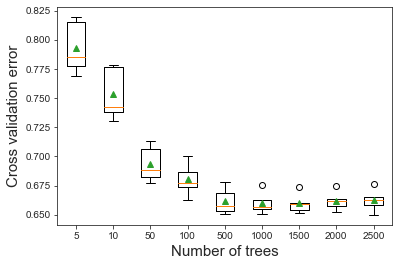

In [ ]:
def get_models():
    models = dict()
    n_trees = [5, 10, 50, 100, 500, 1000, 1500, 2000, 2500]
    for n in n_trees:
        models[str(n)] = GradientBoostingRegressor(n_estimators=n,random_state=1,loss='huber')
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = KFold(n_splits=5, shuffle=True, random_state=1)
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Number of trees',fontsize=15);

>1 0.742 (0.027)
>2 0.711 (0.025)
>3 0.694 (0.022)
>4 0.679 (0.022)
>5 0.664 (0.022)
>6 0.652 (0.022)
>7 0.642 (0.017)
>8 0.633 (0.020)
>9 0.629 (0.022)
>10 0.619 (0.023)
>11 0.623 (0.023)
>12 0.628 (0.022)
>13 0.638 (0.023)
>14 0.648 (0.024)
>15 0.667 (0.023)
>16 0.680 (0.032)
>17 0.693 (0.034)
>18 0.710 (0.035)
>19 0.732 (0.034)
>20 0.749 (0.034)


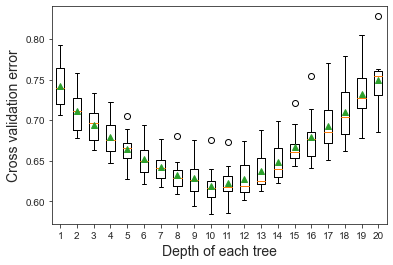

In [ ]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,21):
        models[str(i)] = GradientBoostingRegressor(n_estimators=50,random_state=1,max_depth=i,loss='huber')
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = KFold(n_splits = 10, shuffle=True, random_state=1)
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=14)
plt.xlabel('Depth of each tree',fontsize=14);

>0.1 0.7 (0.0)
>0.3 0.7 (0.0)
>0.5 0.7 (0.0)
>0.7 0.7 (0.0)
>0.9 0.7 (0.0)
>1.1 0.7 (0.0)
>1.3 0.8 (0.0)
>1.5 0.8 (0.0)
>1.7 0.9 (0.0)
>1.9 1.0 (0.0)


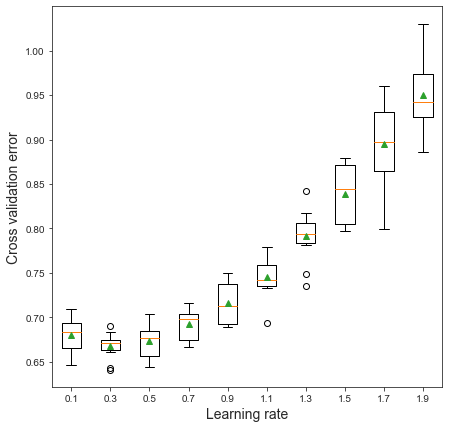

In [ ]:
def get_models():
    models = dict()
    for i in np.arange(0.1, 2.1, 0.2):
        key = '%.1f' % i
        models[key] = GradientBoostingRegressor(learning_rate=i,random_state=1,loss='huber')
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.1f (%.1f)' % (name, np.mean(scores), np.std(scores)))

# plot model performance for comparison
plt.figure(figsize=(7, 7))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=14)
plt.xlabel('Learning rate',fontsize=14);

>0.20 0.68 (0.02)
>0.30 0.68 (0.02)
>0.40 0.68 (0.02)
>0.50 0.68 (0.02)
>0.60 0.68 (0.02)
>0.70 0.68 (0.02)
>0.80 0.68 (0.02)
>0.90 0.68 (0.02)
>1.00 nan (nan)


Text(0.5, 0, 'Subsample')

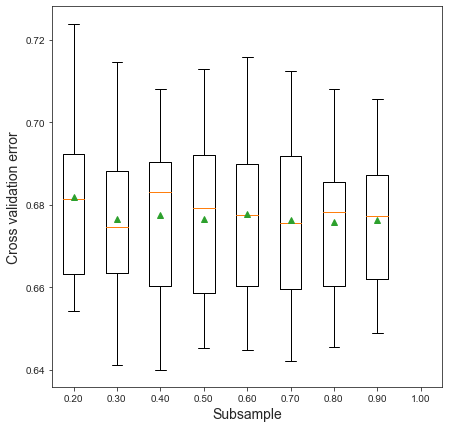

In [ ]:
def get_models():
    models = dict()
    for s in np.arange(0.2, 1.01, 0.1):
        key = '%.2f' % s
        models[key] = GradientBoostingRegressor(random_state=1,subsample=s,loss='huber')
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.2f (%.2f)' % (name, np.mean(scores), np.std(scores)))

# plot model performance for comparison
plt.figure(figsize=(7, 7))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=14)
plt.xlabel('Subsample',fontsize=14)

In [ ]:
# coarse grid search
start_time = time.time()
model = GradientBoostingRegressor(random_state = 1, loss='huber')
grid = dict()
grid['n_estimators'] = [1200, 1400, 1600, 1800]
grid['learning_rate'] = [0.1, 0.2, 0.3]
grid['max_depth'] = [8, 10, 12, 14]
grid['subsample'] = [0.4, 0.6, 0.8, 1]

cv = KFold(n_splits = 4, shuffle=True, random_state=1)
grid_search = RandomizedSearchCV(estimator = model, 
                                 param_distributions = grid, 
                                 n_jobs = -1, cv = cv, 
                                 n_iter = 50,
                                 scoring = 'neg_mean_squared_error',
                                 verbose = True)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (np.sqrt(-grid_result.best_score_), grid_result.best_params_))

print("Time taken = ",(time.time()-start_time)/60," minutes")

Fitting 4 folds for each of 50 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best: 0.623675 using {'subsample': 0.8, 'n_estimators': 1400, 'max_depth': 8, 'learning_rate': 0.1}
Time taken =  26.075682441393536  minutes


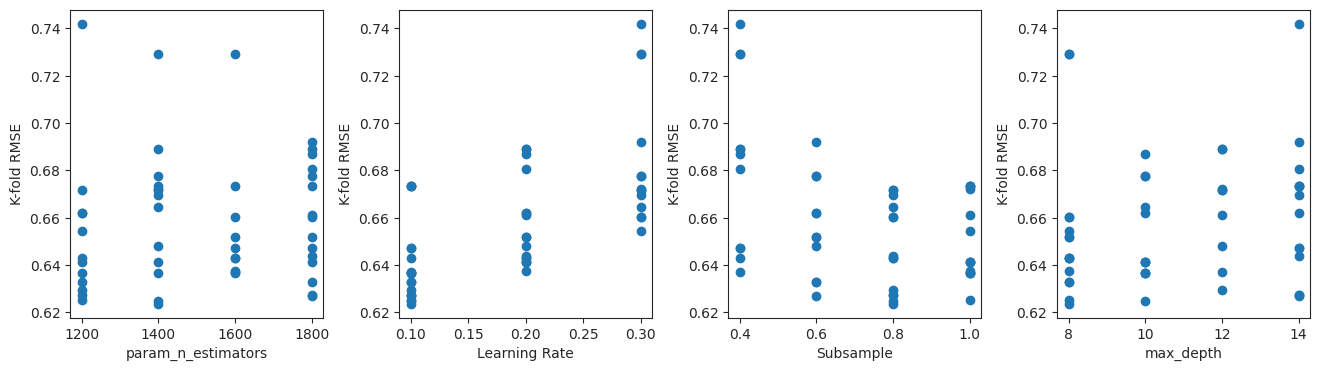

In [ ]:
cv_results = pd.DataFrame(grid_result.cv_results_)

fig, axes = plt.subplots(1, 4, figsize = (16, 4))
plt.subplots_adjust(wspace = 0.3)
axes[0].plot(cv_results.param_n_estimators, np.sqrt(-cv_results.mean_test_score), 'o')
axes[0].set_xlabel('param_n_estimators')
axes[0].set_ylabel('K-fold RMSE')
axes[1].plot(cv_results.param_learning_rate, np.sqrt(-cv_results.mean_test_score), 'o')
axes[1].set_xlabel('Learning Rate')
axes[1].set_ylabel('K-fold RMSE')
axes[2].plot(cv_results.param_subsample, np.sqrt(-cv_results.mean_test_score), 'o')
axes[2].set_xlabel('Subsample')
axes[2].set_ylabel('K-fold RMSE');
axes[3].plot(cv_results.param_max_depth, np.sqrt(-cv_results.mean_test_score), 'o')
axes[3].set_xlabel('max_depth')
axes[3].set_ylabel('K-fold RMSE');

In [ ]:
model = GradientBoostingRegressor(n_estimators = 1400, loss = 'huber', max_depth = 8, 
                                  learning_rate = 0.1, subsample = 0.8, 
                                  random_state = 45).fit(X_train,y_train)
pred = model.predict(X_test)
print('The test RMSE is', np.sqrt(mean_squared_error(y_test, pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The test RMSE is 0.6377800904077188


In [ ]:
# rounded rmse
print('The test RMSE is', np.sqrt(mean_squared_error(y_test, np.around(pred))))

The test RMSE is 0.6776656765919086


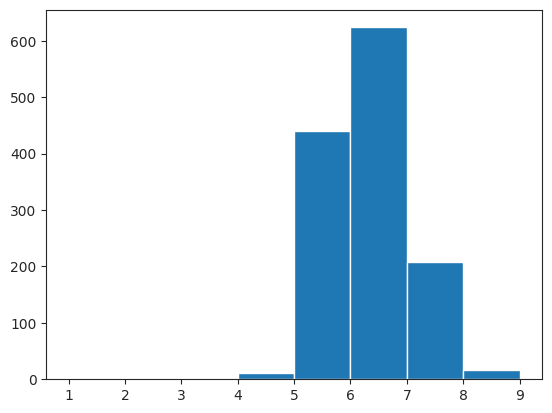

In [ ]:
plt.hist(np.around(pred), bins = np.arange(1,10));

In [ ]:
# finer grid search
start_time = time.time()
model = GradientBoostingRegressor(random_state = 1, loss='huber')
grid = dict()
grid['n_estimators'] = [1300, 1350, 1400, 1450, 1500]
grid['learning_rate'] = [0.8, 0.1, 0.15]
grid['max_depth'] = [8, 9, 10]
grid['subsample'] = [0.7, 0.8, 0.9, 1]

cv = KFold(n_splits = 4, shuffle=True, random_state=1)
grid_search = RandomizedSearchCV(estimator = model, 
                                 param_distributions = grid, 
                                 n_jobs = -1, cv = cv, 
                                 n_iter = 50,
                                 scoring = 'neg_mean_squared_error',
                                 verbose = True)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (np.sqrt(-grid_result.best_score_), grid_result.best_params_))

print("Time taken = ",(time.time()-start_time)/60," minutes")

Fitting 4 folds for each of 50 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best: 0.620413 using {'subsample': 0.8, 'n_estimators': 1300, 'max_depth': 9, 'learning_rate': 0.1}
Time taken =  18.01649567683538  minutes


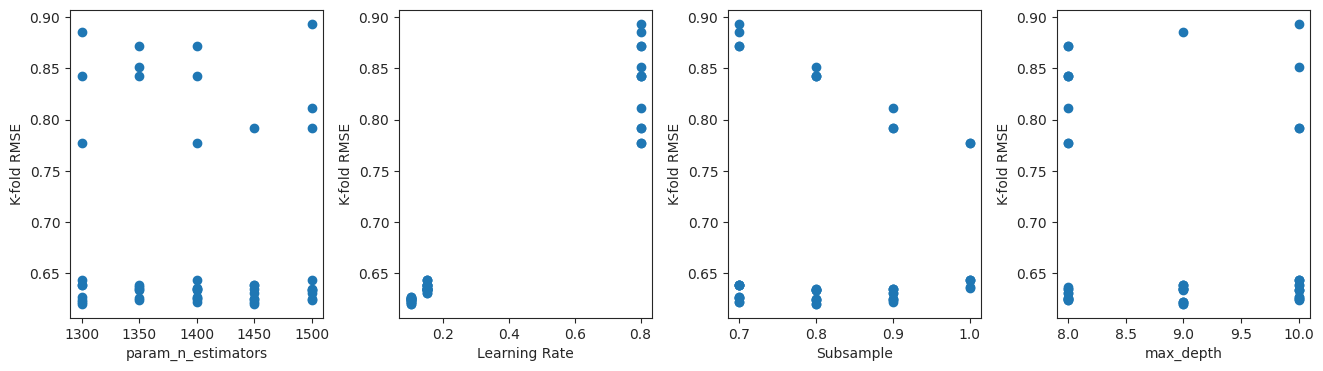

In [ ]:
cv_results = pd.DataFrame(grid_result.cv_results_)

fig, axes = plt.subplots(1, 4, figsize = (16, 4))
plt.subplots_adjust(wspace = 0.3)
axes[0].plot(cv_results.param_n_estimators, np.sqrt(-cv_results.mean_test_score), 'o')
axes[0].set_xlabel('param_n_estimators')
axes[0].set_ylabel('K-fold RMSE')
axes[1].plot(cv_results.param_learning_rate, np.sqrt(-cv_results.mean_test_score), 'o')
axes[1].set_xlabel('Learning Rate')
axes[1].set_ylabel('K-fold RMSE')
axes[2].plot(cv_results.param_subsample, np.sqrt(-cv_results.mean_test_score), 'o')
axes[2].set_xlabel('Subsample')
axes[2].set_ylabel('K-fold RMSE');
axes[3].plot(cv_results.param_max_depth, np.sqrt(-cv_results.mean_test_score), 'o')
axes[3].set_xlabel('max_depth')
axes[3].set_ylabel('K-fold RMSE');

In [ ]:
model = GradientBoostingRegressor(n_estimators = 1300, loss = 'huber', max_depth = 9, 
                                  learning_rate = 0.1, subsample = 0.8, 
                                  random_state = 1).fit(X_train, y_train)
pred = model.predict(X_test)
# not rounded rmse
print('The test RMSE is', np.sqrt(mean_squared_error(y_test, pred)))
# rounded rmse
print('The test RMSE is', np.sqrt(mean_squared_error(y_test, np.around(pred))))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The test RMSE is 0.6371217317071686
The test RMSE is 0.6713934992009014


In [ ]:
model = GradientBoostingRegressor(n_estimators = 1300, loss = 'huber', max_depth = 9, 
                                  learning_rate = 0.08, subsample = 0.85, 
                                  random_state = 1).fit(X_train, y_train)
pred = model.predict(X_test)
# not rounded rmse
print('The test RMSE is', np.sqrt(mean_squared_error(y_test, pred)))
# rounded rmse
print('The test RMSE is', np.sqrt(mean_squared_error(y_test, np.around(pred))))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The test RMSE is 0.6222286057845355
The test RMSE is 0.6586699885725429


In [ ]:
model = GradientBoostingRegressor(n_estimators = 1300, loss = 'huber', max_depth = 7, 
                                  learning_rate = 0.08, subsample = 0.85, 
                                  random_state = 1).fit(X_train, y_train)
pred = model.predict(X_test)
# not rounded rmse
print('The test RMSE is', np.sqrt(mean_squared_error(y_test, pred)))
# rounded rmse
print('The test RMSE is', np.sqrt(mean_squared_error(y_test, np.around(pred))))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The test RMSE is 0.6262500185047857
The test RMSE is 0.6713934992009014


In [ ]:
model = GradientBoostingRegressor(n_estimators = 1400, loss = 'huber', max_depth = 9, 
                                  learning_rate = 0.07, subsample = 0.8, 
                                  random_state = 1).fit(X_train, y_train)
pred = model.predict(X_test)
# not rounded rmse
print('The test RMSE is', np.sqrt(mean_squared_error(y_test, pred)))
# rounded rmse
print('The test RMSE is', np.sqrt(mean_squared_error(y_test, np.around(pred))))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The test RMSE is 0.6284566433715972
The test RMSE is 0.6719661163618754


In [ ]:
features_df = pd.DataFrame(zip(X_train.columns, list(model.feature_importances_)),
                           columns =['Predictor', 'Importance'])
features_df.sort_values(by = 'Importance', ascending = False)

,Predictor,Importance
10,alcohol,0.250846
1,volatile acidity,0.124307
5,free sulfur dioxide,0.080374
9,sulphates,0.078176
6,total sulfur dioxide,0.077565
3,residual sugar,0.072411
8,pH,0.069419
4,chlorides,0.067845
7,density,0.066263
2,citric acid,0.058864
